# Load Dataset

In [1]:
import pandas as pd
import azureml.core
from azureml.core import Dataset, Datastore, Workspace

ws = Workspace.from_config()

qualitydf = Dataset.get_by_name(workspace=ws,name="iiot_quality_labeled_data").to_pandas_dataframe()
print("Rows => {0}".format(qualitydf.shape[0]))
print("Columns => {0}".format(qualitydf.shape[1]))
qualitydf.head()

Rows => 7711
Columns => 44


,BatchNumber,S1,S10,S11,S12,S13,S14,S15,S16,S17,...,S4,S40,S41,S5,S6,S7,S8,S9,SourceTimestamp,Quality
0,7423.0,4.998839,39.5,21.9,866.6161,2046.699,2089.468,943.1278,22.02698,25.83976,...,None,9501.005,7221.264648,4.999668,5.050548,23.57390,27.6,36.1,2022-05-05 00:40:20.077,1
1,7424.0,4.999668,39.4,21.8,893.7124,2052.430,2069.875,930.0323,22.02698,25.67179,...,None,9501.005,7213.028320,4.999668,5.056084,23.60346,27.7,35.9,2022-05-05 00:40:22.084,1
2,7425.0,4.999668,39.5,21.9,894.3060,2060.232,2075.162,930.1899,22.36291,25.83976,...,None,9501.005,7229.500977,4.999668,5.048703,23.57944,28.1,35.9,2022-05-05 00:40:24.091,1
3,7426.0,4.999668,39.6,21.9,876.8541,2046.037,2137.928,943.1278,22.19494,25.67179,...,None,9501.005,7213.028320,4.999668,5.047780,23.60447,28.4,35.9,2022-05-05 00:40:26.098,1
4,7427.0,4.999668,39.6,22.1,895.3438,2033.450,2090.136,943.4471,22.02698,25.83976,...,None,9501.005,7229.500977,4.999668,5.045012,23.64226,28.8,36.1,2022-05-05 00:40:28.105,1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sensortimeseriesdf = qualitydf
sensortimeseriesdf["timestamp"] = pd.to_datetime(sensortimeseriesdf['SourceTimestamp'])
sensortimeseriesdf.set_index("timestamp",inplace=True)
sensortimeseriesdf.head()

,BatchNumber,S1,S10,S11,S12,S13,S14,S15,S16,S17,...,S4,S40,S41,S5,S6,S7,S8,S9,SourceTimestamp,Quality
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-05-05 00:40:20.077,7423.0,4.998839,39.5,21.9,866.6161,2046.699,2089.468,943.1278,22.02698,25.83976,...,None,9501.005,7221.264648,4.999668,5.050548,23.57390,27.6,36.1,2022-05-05 00:40:20.077,1
2022-05-05 00:40:22.084,7424.0,4.999668,39.4,21.8,893.7124,2052.430,2069.875,930.0323,22.02698,25.67179,...,None,9501.005,7213.028320,4.999668,5.056084,23.60346,27.7,35.9,2022-05-05 00:40:22.084,1
2022-05-05 00:40:24.091,7425.0,4.999668,39.5,21.9,894.3060,2060.232,2075.162,930.1899,22.36291,25.83976,...,None,9501.005,7229.500977,4.999668,5.048703,23.57944,28.1,35.9,2022-05-05 00:40:24.091,1
2022-05-05 00:40:26.098,7426.0,4.999668,39.6,21.9,876.8541,2046.037,2137.928,943.1278,22.19494,25.67179,...,None,9501.005,7213.028320,4.999668,5.047780,23.60447,28.4,35.9,2022-05-05 00:40:26.098,1
2022-05-05 00:40:28.105,7427.0,4.999668,39.6,22.1,895.3438,2033.450,2090.136,943.4471,22.02698,25.83976,...,None,9501.005,7229.500977,4.999668,5.045012,23.64226,28.8,36.1,2022-05-05 00:40:28.105,1


# Frequency Analysis

**Nyquist Sampling Theorem: **
A continuous-time signal can be sampled and perfectly reconstructed from 
its samples if the waveform is sampled over twice as fast as it's highest 
frequency component.

Frequency analysis helps understand the data collection threshold for each sensor, and evaluate different frequencies for comparision.

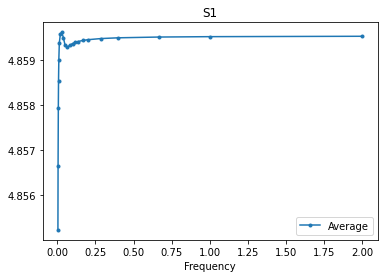

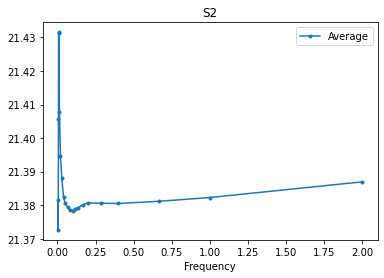

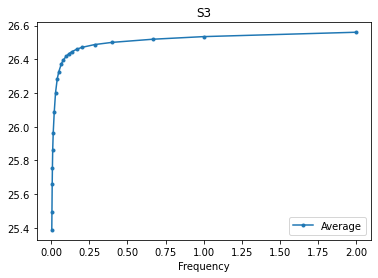

In [3]:
# Simpler version of FFT for manual analysis
import warnings
warnings.filterwarnings('ignore')

sensorlist = ["S1","S2","S3"]

time_interval_inseconds = 2  # time interval between two data points in seconds
frequenyhz = (1 / time_interval_inseconds) 
frequencyIntervals = [1,2,3,5,7,10,12,15,17,20,25,30,40,50,70,100,150,200,250,300,400,500]

for selectedsensor in sensorlist:
    selectedsensordf = sensortimeseriesdf[[selectedsensor]]
    freqdf = pd.DataFrame(columns=['Average','Frequency'])

    for f in frequencyIntervals:
        selectedsensordf[selectedsensor + "_" + str(f)] = selectedsensordf.iloc[:,0].rolling(window=f).mean()
        freqdf.loc[len(freqdf.index)] = [selectedsensordf[selectedsensor + "_" + str(f)].mean(), (1/(frequenyhz*f))]

    freqdf.plot.line(x="Frequency",y="Average",style='.-')
    plt.title(selectedsensor)